## Car Price Prediction Model (Multiple Linear Regression Analysis)

### Introduction
The objective of this project is to use Multiple Linear Regression Analysis predict the selling price of used cars based on variables such as the fuel type, transmission, current price and distance driven. This analysis is important for decision makers to understand the complex relationships between various variables to draw insights and make informed decisions.

### Data Source
The dataset used in this project was obtained from Kaggle and can be accessed at https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

### Questions
We hope to answer the following questions at the end of this analysis:
1. How does car age affect the selling price?
2. What effect does the fuel type have on the selling price?
3. How does the car transmission affect the selling price?

### Importing Libraries and Dependencies

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import piplite 
await piplite.install('seaborn')
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

###
### Data Cleaning and Pre-processing

##### The data will need to be loaded to a Pandas dataframe called car_data using the read_csv function

In [2]:
car_data = pd.read_csv('car data.csv')

####
Next, the head and tail functions can be used to see the first and last 5 columns in the data set

In [3]:
car_data.head() #first 5 rows

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.tail() #last 5 rows

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


####
Shape function to see the number of columns and rows

In [5]:
car_data.shape

(301, 9)

####
Info function To see the data types in our dataset

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


####
Column function to see column names

In [7]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

###
Using the null function to checking for empty cells in the data set

In [3]:
car_data.isnull().sum() #To check for null or missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Checking the distribution of the categorical data using the counts function

In [8]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


###
### Data Visualization
**1. Bar plot of Manual versus automatic transmission**

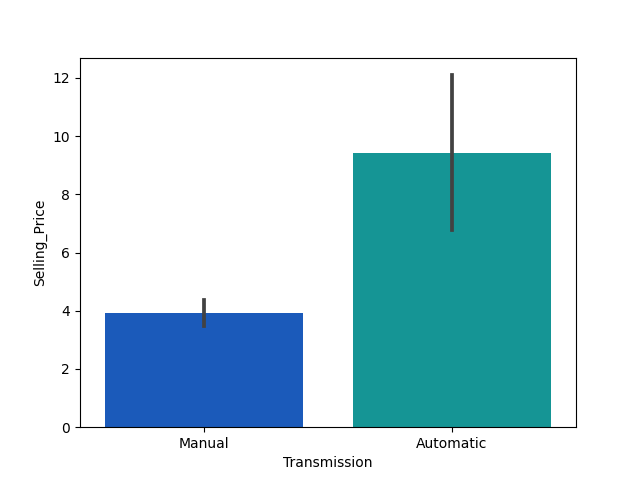

In [4]:
sns.barplot(x='Transmission',y='Selling_Price',data=car_data,palette='winter')
plt.show ()

##### Automatic transmissions are widely used.

####
**2. Bar plot of Fuel type versus selling price**

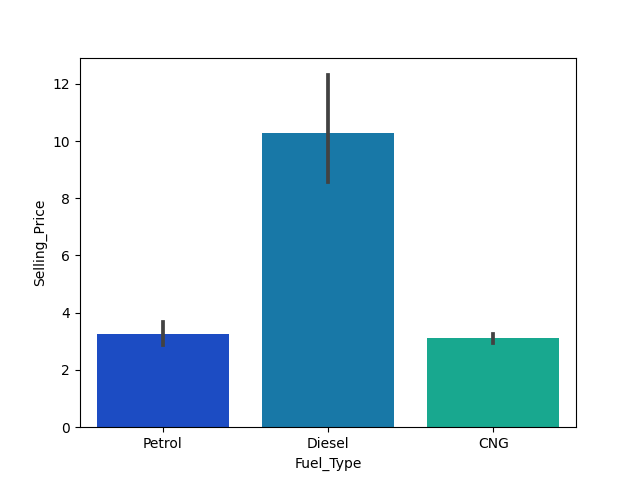

In [5]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=car_data,palette='winter')
plt.show()

##### Diesel is widely used.

###
**3. Bar plot of Seller type versus selling price**

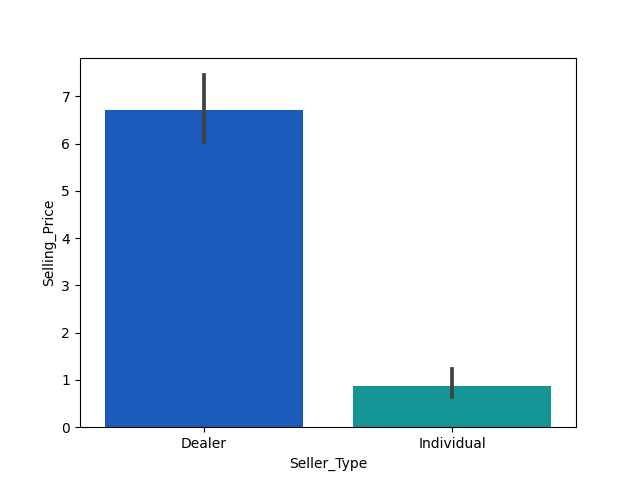

In [132]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=car_data,palette='winter')
plt.show()

Dealers have higher selling prices than Individuals.

####
**4. Vehicle Age versus Selling price**

To see the relationship between the age of the car and selling price, we can create a new dataframe to store the age values. The dataframe will take into account the current year of our analysis

In [42]:
car_data['vehicle_age']=2022 - car_data['Year']
car_data.head(10) #To see the first 10 rows

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,8
1,sx4,2013,4.75,9.54,43000,1,0,0,0,9
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,5
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,11
4,swift,2014,4.60,6.87,42450,1,0,0,0,8
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0,4
6,ciaz,2015,6.75,8.12,18796,0,0,0,0,7
7,s cross,2015,6.50,8.61,33429,1,0,0,0,7
8,ciaz,2016,8.75,8.89,20273,1,0,0,0,6
9,ciaz,2015,7.45,8.92,42367,1,0,0,0,7


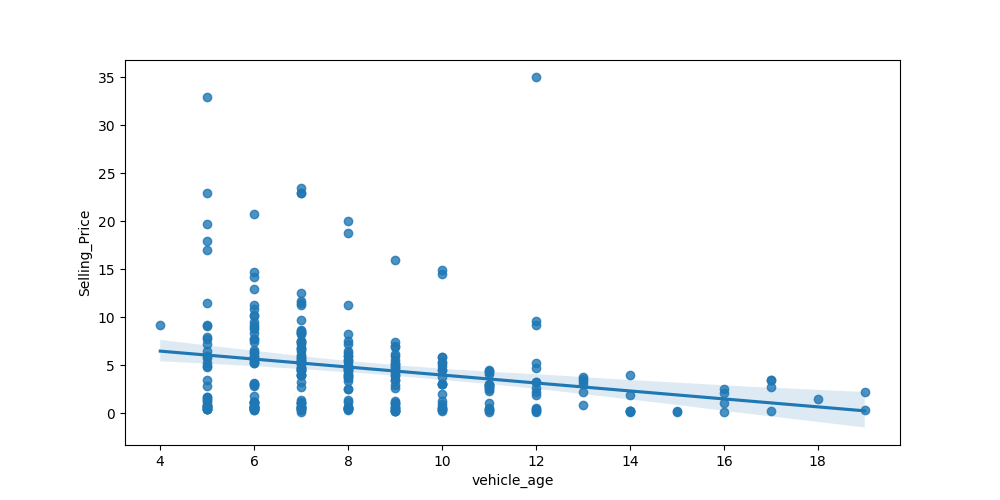

In [14]:
plt.figure(figsize=(10,5))
sns.regplot(x='vehicle_age',y='Selling_Price',data=car_data)
plt.show()

###
### Categorical Data Encoding
The categorical data can be manually encoded to make it easier for the machine model to make predictions. Since the machine best deals with numerical values, we can assign values to these categories using the replace function. For example, 0 for Petrol, 1 for Diesel, and 2 for CNG.

In [31]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_data.replace({'Transmission':{'Manual':0,'Automatic':1,}},inplace=True)

In [32]:
car_data.head() #To see the first 5 rows of the dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,8
1,sx4,2013,4.75,9.54,43000,1,0,0,0,9
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,5
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,11
4,swift,2014,4.60,6.87,42450,1,0,0,0,8


###
### Data Splitting
The selling price of the respective cars can be predicted by using the Linear Regression Model. The data will be split into training and testing sets. The independent variables X (Year, Kms_driven, Fuel/Seller Type and Transmission), and the dependent variable Y, would be the selling price to be predicted. We will drop the car name and selling price columns will as they are not needed for the analysis. The pandas drop function can be used to drop the columns with the following commands

In [33]:
X = car_data.drop(['Car_Name','Selling_Price','Owner'], axis=1) 

In [34]:
Y = car_data['Selling_Price']

###
The X and Y columns can be printed to ensure the required columns have been dropped as expected

In [35]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     vehicle_age  
0              8  
1              9  
2     

In [36]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


###
The data set now contains only numerical values which is what we want for the analysis. The train test split function will be used to split the data, 90 percent will be used for training and 10 percent for testing.

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

###
### Linear Regression Model
We will use the Linear Regression model denoted by a variable LR_model to fit the X and Y values in the dataset

In [38]:
LR_model = LinearRegression()

In [39]:
LR_model.fit(X_train,Y_train) #To fit x_train and y_train to the model

LinearRegression()

###
### Model Evaluation
**1. Prediction with Training Data**

In [40]:
training_data_pred = LR_model.predict(X_train)

#Use the metrics library to determine the rsq error
r_square =metrics.r2_score(Y_train,training_data_pred)
print(f'R squared error is {(round(r_square,6))}')

R squared error is 0.878205


###
Scatter plot to show actual versus predicted values 

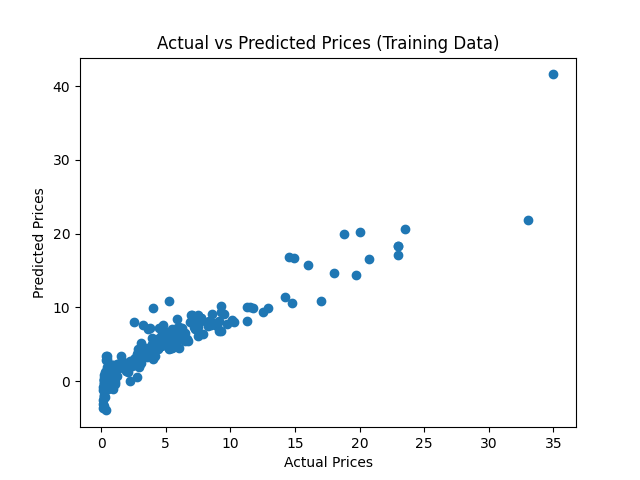

In [143]:
plt.scatter(Y_train, training_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Training Data)")
plt.show()

### 
The plot shows that the values are closer together with a deviation as the prices get larger. The values predicted are close to the actual values from the given set of data.

###
**2. Prediction with Test data**

In [41]:
testing_data_pred = LR_model.predict(X_test)

#Use the metrics library to dtermin the rsq error
r_square2 =metrics.r2_score(Y_test,testing_data_pred)
print(f'R squared error is {(round(r_square2,6))}') 

R squared error is 0.849862


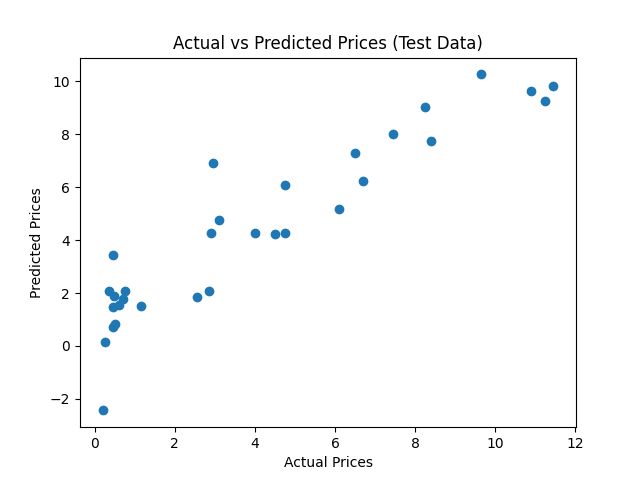

In [145]:
plt.scatter(Y_test, testing_data_pred) 
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Test Data)")
plt.show()

### Insights
- From the prediction model, the current and selling price of the cars are highly correlated. 
- The selling prices are higher for automatic than manual transmissions. 
- Diesel operated vehicles cost more than CNG and Petrol operated vehicles.
- The regression plot shows a strong relationship between the car age and the selling price with a few outliers, however, the overall trend depicts that the lower the age of a car the higher will be the price and vice versa.